In [49]:
# Bring in Required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline

# Library of machine learning classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [50]:
df= pd.read_csv('Loyalty.csv')

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
df.shape

(7043, 21)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [55]:
df.loc[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [56]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [57]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [58]:
# Convert the Yes and No string values in the Churn column to 1 and 0.
df.loc[df.Churn=='No','Churn'] = 0 
df.loc[df.Churn=='Yes','Churn'] = 1

In [59]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [60]:
# Change "No internet service" to "No" for the columns listed below.
cols = ['OnlineBackup', 'StreamingMovies','DeviceProtection',
                'TechSupport','OnlineSecurity','StreamingTV']
for i in cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

In [61]:
# All spaces replaced with null values.
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

# 'Total Charges' feature should not have any null values., drop them
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

# Change the numbers in the "Total Charges" column to float data type.
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [62]:
df["Churn"].value_counts().values

array([5163, 1869], dtype=int64)

# Data Visualization

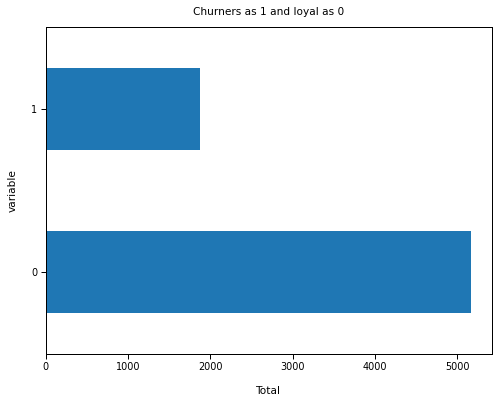

In [63]:
#The counts of the Churn values should be used to create a horizontal bar chart.
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Total", labelpad=14)
plt.ylabel("variable", labelpad=14)
plt.title("Churners as 1 and loyal as 0", y=1.02);

In [64]:
graphs = df

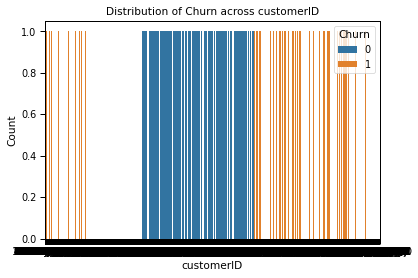

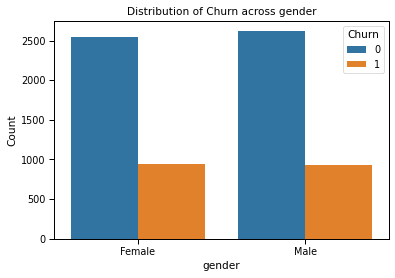

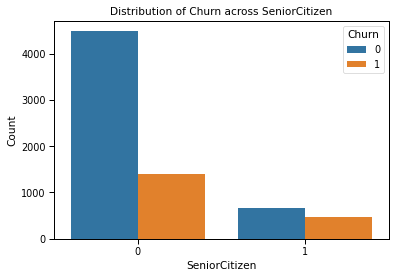

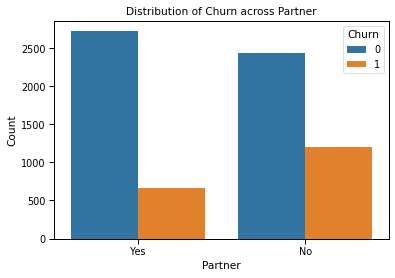

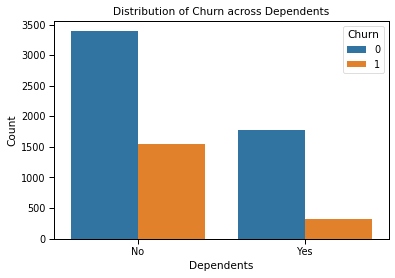

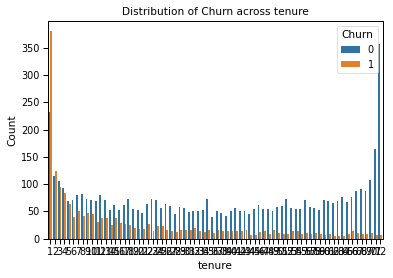

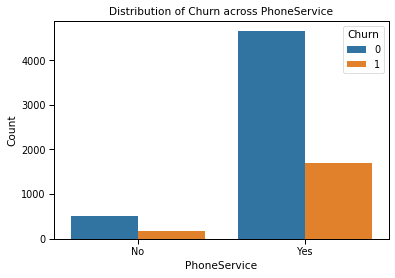

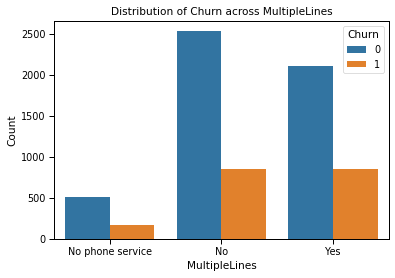

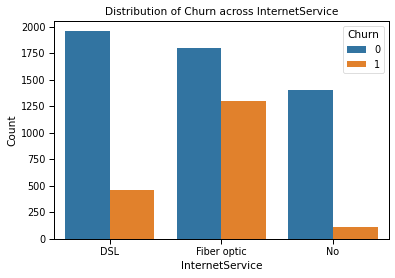

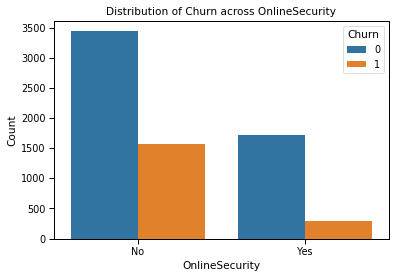

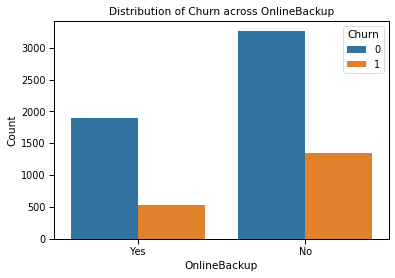

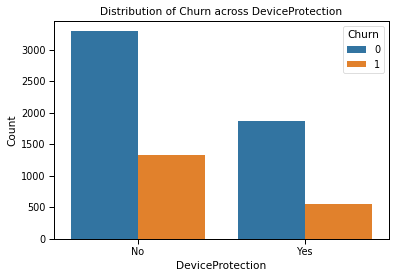

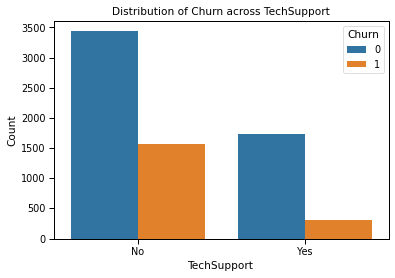

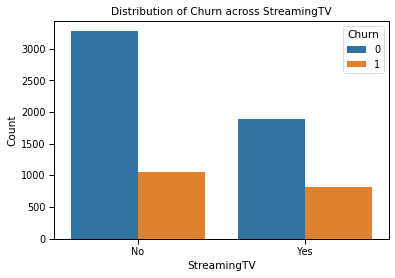

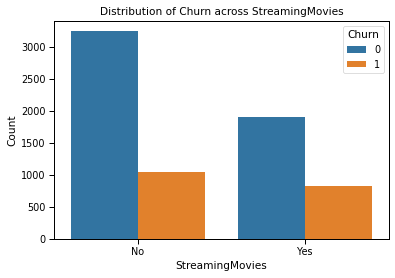

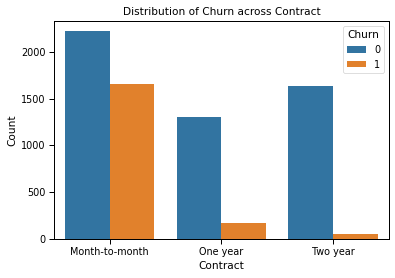

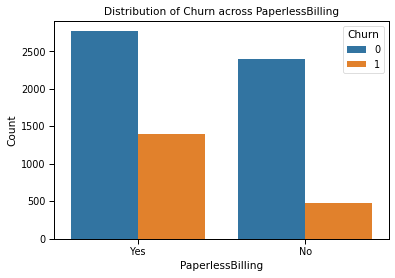

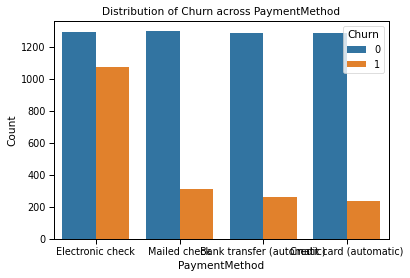

In [65]:
#  Iterate over all predictors in the DataFrame except "Churn," "TotalCharges," and "MonthlyCharges."
for i, predictor in enumerate(graphs.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    
#For each predictor, make a new graph.
    plt.figure(i)
    
    # To determine how the 'Churn' of the current predictor is spread, create a countplot.
    sns.countplot(data=graphs, x=predictor, hue='Churn')
    
   
    plt.xlabel(predictor)  
    plt.ylabel('Count')    
    plt.title(f'Distribution of Churn across {predictor}') 

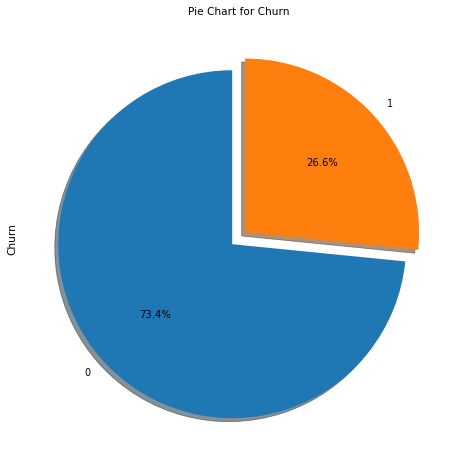

In [66]:
# pie chart for the churn analysis.
df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

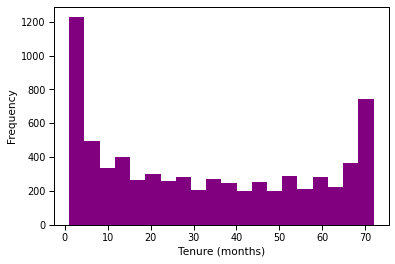

In [67]:
# Tenure column histogram
plt.hist(df['tenure'], bins=20, color='purple')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

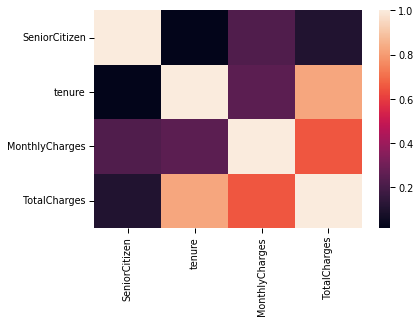

In [68]:
#correlation heatmap
sns.heatmap(df.corr())

<AxesSubplot:>

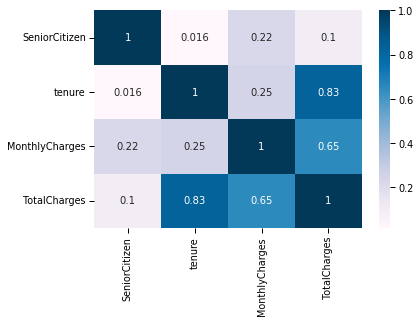

In [69]:
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='PuBu')

In [70]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


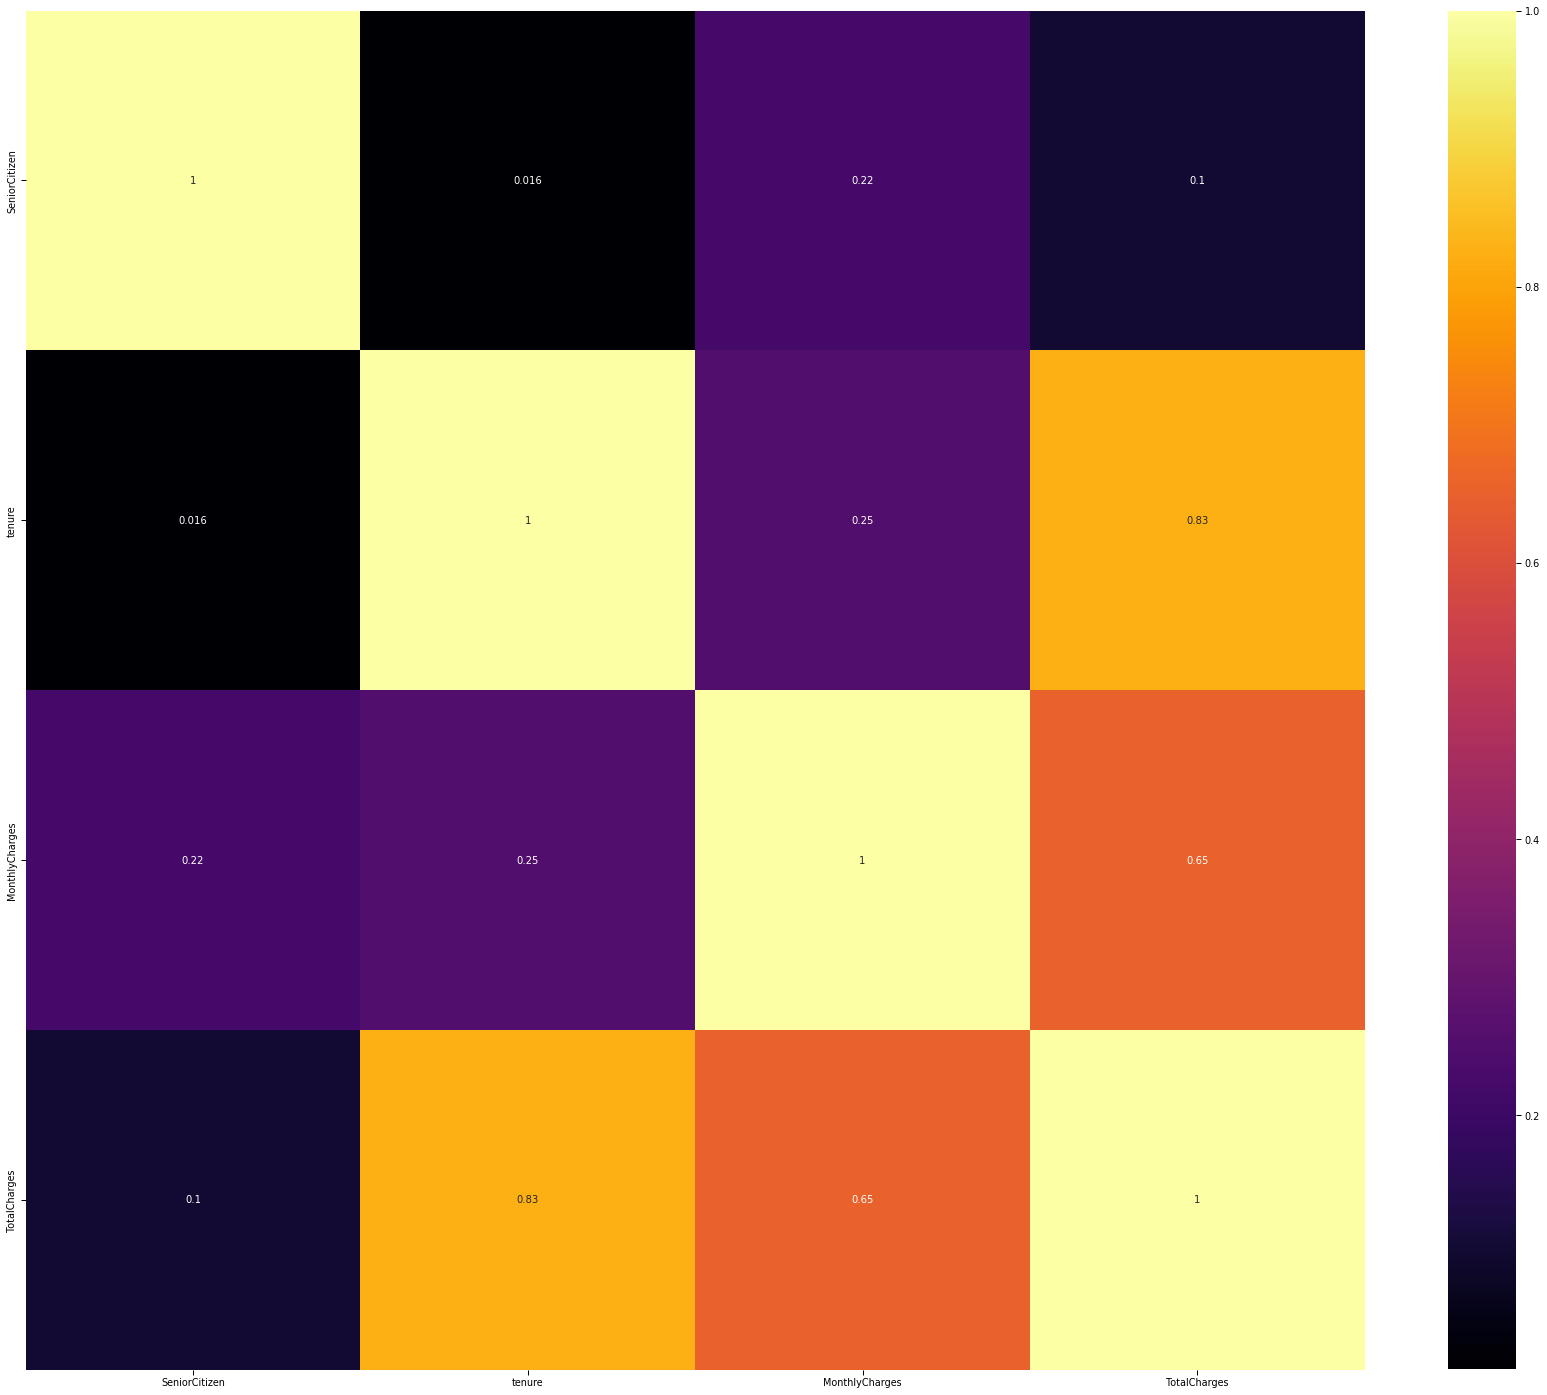

In [71]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="inferno")
plt.show()

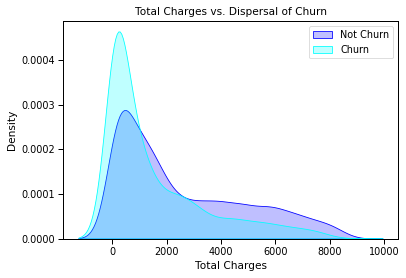

In [72]:
# Give Dataframe churn status
not_churn_data = df[df["Churn"] == 0]["TotalCharges"]
churn_data = df[df["Churn"] == 1]["TotalCharges"]

# Plot KDEs for non-churned and churned data.
sns.kdeplot(not_churn_data, color="blue", shade=True, label="Not Churn")
sns.kdeplot(churn_data, color="cyan", shade=True, label="Churn")

# Establishing labels and titles
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Total Charges vs. Dispersal of Churn')
plt.legend(loc='upper right')
plt.show()

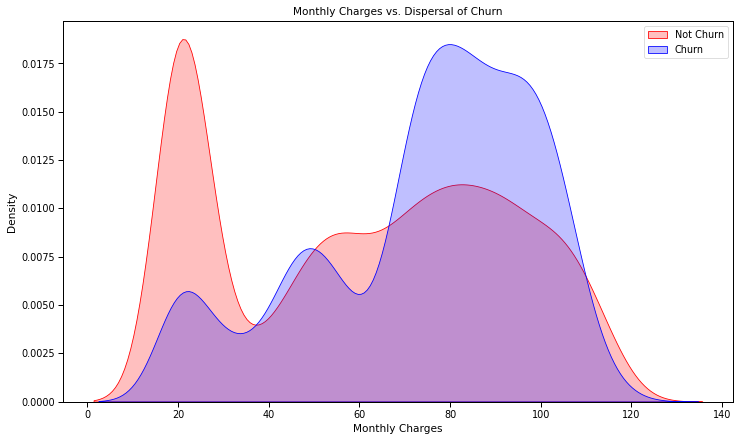

In [73]:
# Set the figure and text sizes.
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.1)

# Filter the DataFrame based on the churn state.
not_churn_data = df[df["Churn"] == 0]["MonthlyCharges"]
churn_data = df[df["Churn"] == 1]["MonthlyCharges"]

# Plot KDEs for non-churned and churned data.
ax = sns.kdeplot(not_churn_data, color="red", shade=True, label="Not Churn")
ax = sns.kdeplot(churn_data, color="blue", shade=True, label="Churn")

# Establishing labels and titles
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Monthly Charges vs. Dispersal of Churn')


plt.legend(loc='upper right')
plt.show()

# Feature Scaling

In [74]:
# One Hot Encoding is performed using the get_dummies method.
columns_to_encode = ['Contract', 'Dependents', 'DeviceProtection', 'gender',
                     'InternetService', 'MultipleLines', 'OnlineBackup',
                     'OnlineSecurity', 'PaperlessBilling', 'Partner',
                     'PaymentMethod', 'PhoneService', 'SeniorCitizen',
                     'StreamingMovies', 'StreamingTV', 'TechSupport']

# By one-hot encoding the supplied columns, create a new DataFrame.
churn_dataset = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [75]:
#Conduct One Hot Encoding and Feature Scaling
#To put'tenure', 'MonthlyCharges', 'TotalCharges' in the same scale
standardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Use the fit_transform() function to apply the feature scaling operation to the dataset.
churn_dataset[columns_for_ft_scaling] = standardScaler.fit_transform(churn_dataset[columns_for_ft_scaling])

In [76]:
# View the list of values
churn_dataset.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,gender_Male,...,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,0.512486,-0.747850,-0.195248,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,-1.239504,0.196178,-0.940457,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [77]:
#Get_dummies technique resulted in an increase in the number of columns and the addition of suffixes.
churn_dataset.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year', 'Dependents_Yes',
       'DeviceProtection_Yes', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'SeniorCitizen_1', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'TechSupport_Yes'],
      dtype='object')

In [78]:
#Create the variables features X and Y.
y = churn_dataset['Churn']
X = churn_dataset.drop(['Churn','customerID'], axis = 1)

In [79]:
y=y.astype('int')

# Model Building

In [80]:
#  split the data into a training set (70% of the total) and a test set (30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

# Logistic Regression Model

In [81]:
#Fitting a logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

#predict the value of fresh data
pred = logmodel.predict(X_test)

# Using the accuracy_score technique to get accuracy
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

Logistic Regression accuracy is: 81.14
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1561
           1       0.66      0.58      0.61       549

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.81      2110

------------------------------------------------------------


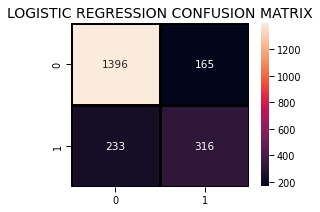

------------------------------------------------------------


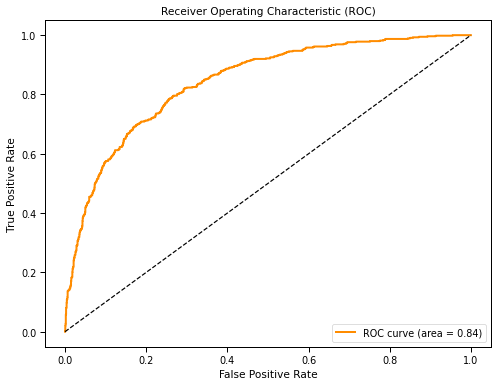

In [82]:
# Calculate accuracy
print("Logistic Regression accuracy is:", logmodel_accuracy)
print('-' * 60)

# Generate forecasts and show categorization report
lr_pred = logmodel.predict(X_test)
report = classification_report(y_test, lr_pred)
print(report)
print('-' * 60)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()
print('-' * 60)

# Calculate AUC-ROC score
y_proba = logmodel.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Calculate and display ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# SVM

In [83]:
#fitting a SVM model
svm_model = SVC(random_state=50, probability=True) 
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=50)

SVM accuracy is: 0.8151658767772512
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1561
           1       0.70      0.51      0.59       549

    accuracy                           0.82      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.81      0.82      0.80      2110

------------------------------------------------------------


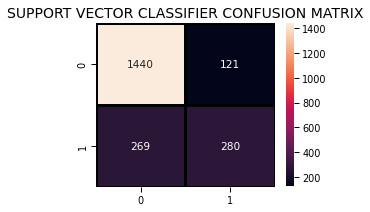

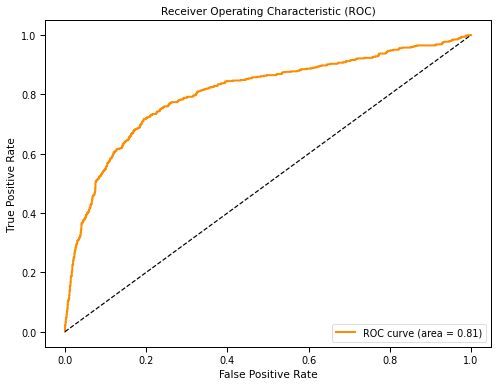

In [84]:
# label predictions for the test data.
predicted_labels = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, predicted_labels)
print("SVM accuracy is:", svm_accuracy)
print('-' * 60)

# Print classification report
print(classification_report(y_test, predicted_labels))
print('-' * 60)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, predicted_labels),
            annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX", fontsize=14)
plt.show()

# Calculate AUC-ROC score
y_proba = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# K Nearest Neighbour

KNN accuracy: 0.7682464454976303
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1561
           1       0.56      0.52      0.54       549

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.77      0.77      2110

------------------------------------------------------------


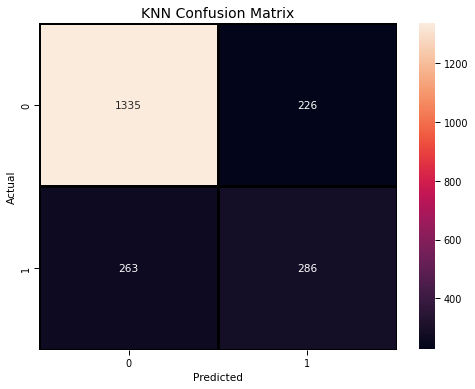

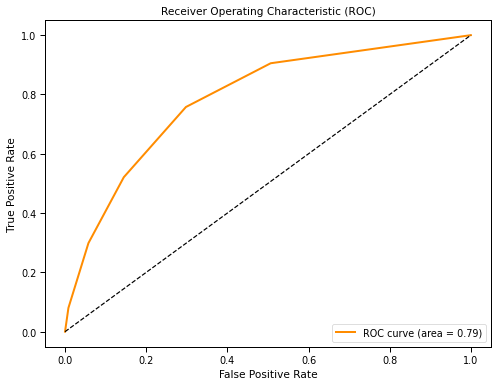

In [85]:
# Develop a K-Nearest Neighbour model and train it.
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

#predict the value of fresh data
knn_pred = knn_model.predict(X_test)

# Calculate accuracy
knn_accuracy = knn_model.score(X_test, y_test)
print("KNN accuracy:", knn_accuracy)

# Print classification report
print('-' * 60)
print("Classification Report:")
print(classification_report(y_test, knn_pred))
print('-' * 60)

# Create a confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("KNN Confusion Matrix", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# For each class, calculate the ROC curve and ROC area.
y_probs = knn_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

Decision Tree accuracy: 0.7327014218009479
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1561
           1       0.49      0.50      0.49       549

    accuracy                           0.73      2110
   macro avg       0.65      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110

------------------------------------------------------------


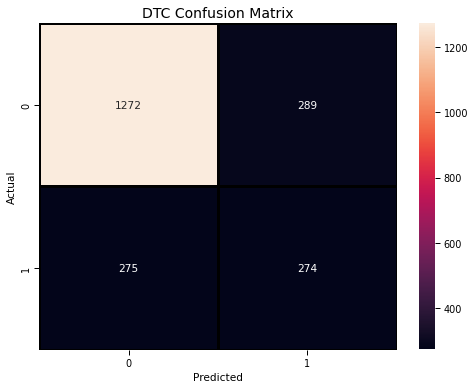

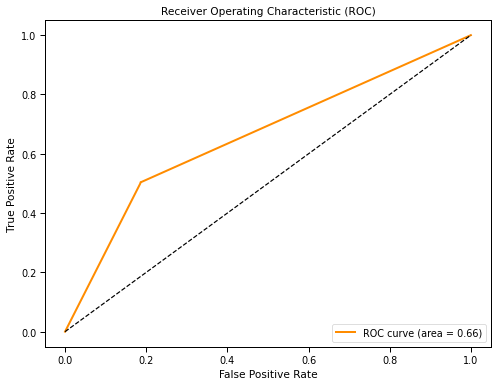

In [86]:
# Create and train a Decision Tree Classifier model
dt_model = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dt_model.fit(X_train, y_train)

# Make predictions on the test data
predict_dt_y = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = dt_model.score(X_test, y_test)
print("Decision Tree accuracy:", accuracy_dt)

# Print classification report
print('-' * 60)
print("Classification Report:")
print(classification_report(y_test, predict_dt_y))
print('-' * 60)

# Create a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predict_dt_y), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("DTC Confusion Matrix", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compute ROC curve and ROC area
y_probs = dt_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Random Forest

Random Forest Classifier accuracy: 79.38
------------------------------------------------------------


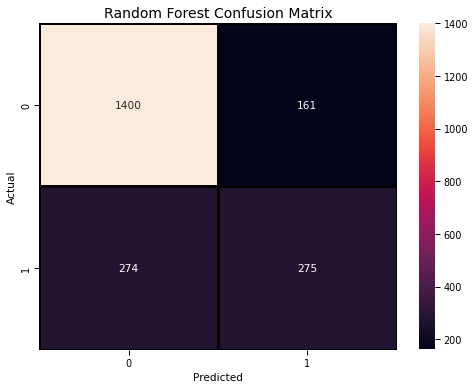

------------------------------------------------------------


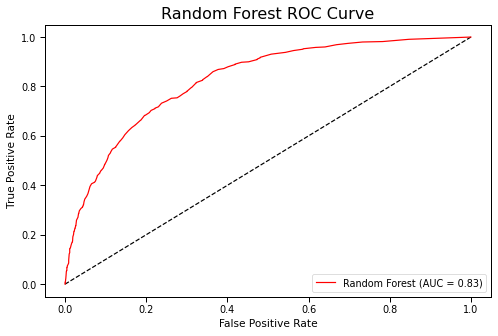

In [87]:
# Make a Random Forest Classifier model and train it.
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(X_train, y_train) 
  
#predict the value of fresh data
rf_pred = rfmodel.predict(X_test)

# Using the accuracy_score technique, get Accuracy
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)
print("Random Forest Classifier accuracy:", rf_accuracy)
print('-' * 60)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("Random Forest Confusion Matrix", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('-' * 60)

# Calculate the ROC curve
y_rfpred_prob = rfmodel.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rfpred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf), color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

# Comparision Table

In [88]:
# Various models should be compared for accuracy.
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest'],
    'Score': [logmodel_accuracy, svm_accuracy*100, knn_accuracy*100, 
              accuracy_dt*100, rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,81.516588,Support Vector Machine
1,81.140000,Logistic Regression
2,79.380000,Random Forest
3,76.824645,K-Nearest Neighbor
4,73.270142,Decision Tree


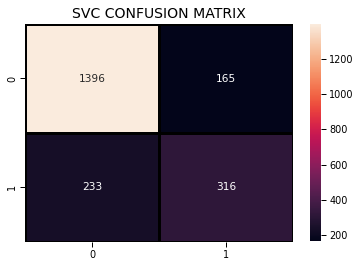

In [89]:
#Create a confusion Matrix for the updated SVM model. 
sns.heatmap(confusion_matrix(y_test, pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVC CONFUSION MATRIX",fontsize=14)
plt.show()

In [90]:
# Estimate the likelihood that each consumer will leave.
churn_dataset['Probability_of_Churn'] = svm_model.predict_proba(churn_dataset[X_test.columns])[:, 1]

In [91]:
# Create a dataframe that displays the likelihood that each client will leave.
churn_dataset[['customerID','Probability_of_Churn']].head()

,customerID,Probability_of_Churn
0,7590-VHVEG,0.453231
1,5575-GNVDE,0.079008
2,3668-QPYBK,0.186093
3,7795-CFOCW,0.092813
4,9237-HQITU,0.771683


In [92]:
# Estimate the likelihood that each consumer will leave.
churn_dataset['Probability_of_Churn'] = logmodel.predict_proba(churn_dataset[X_test.columns])[:,1]

In [93]:
# Create a dataframe that displays the likelihood that each client will leave.
churn_dataset[['customerID','Probability_of_Churn']].head()

,customerID,Probability_of_Churn
0,7590-VHVEG,0.649225
1,5575-GNVDE,0.043673
2,3668-QPYBK,0.340977
3,7795-CFOCW,0.026396
4,9237-HQITU,0.694569
